# Tarea 1
1.a) Integración con método de Euler
$$
y_{n+1}=y_n +f(x_n,y_n)h
$$

b)Integración sobre serie de Taylor a $2^o$ orden

$$
\vec y_{n+1} = \vec y_n + h\vec f + \frac{1}{2}h^2 \left(\frac{\partial \vec f}{\partial x} + \mathbb{J}\vec f \right)
$$
donde $f$ es $f(x_n,\vec y_n), \mathbb{J}$ es el jacobiano de $f$ evaluado $(x_n,\vec y_n)$ y el orden del error es de $O(h^2)$.

c) Integración con método de Runge-Kutta de $2^o$ orden

$$
\vec{y_{n+1}} =\vec{y_n} + \int \vec f (x,\vec{y} ) dx
$$
Con:
$$
\vec f(x) = \vec f(x_o)+ \vec f'(x_o)x + O(h^2)
$$
donde: $ x  \epsilon   [0,h]$
$$
\vec y_{n+1} = \vec y_n + hf(x_n + \frac{1}{2}h , y_n + \frac{h}{2}f(x_n,y_n))
$$
si definimos $k=hf(x_n,y_n)$
$$
\vec y_{n+1} = y_n +hf(x_n+ \frac {1}{2}h , y_n + \frac {1}{2}h)
$$

d) Integración con método de Runge-Kutta de $4^o$ orden 
$$
k_1= f(X_n,Y_n)
$$

$$
k_2=f(X_n+ \frac{h}{2}, Y_n + \frac{h}{2}k_1)
$$

$$
k_3=f(X_n + \frac{h}{2} ,Y_n + \frac{h}{2}k_2)
$$

$$
k_4 =f(X_n +h , Y_n +hk_3)
$$
Entonces el resultado es:
$$
\vec y_{n+1} =\vec y_n + \frac{h}{6}(\vec k_1 +2\vec k_2+2\vec k_3+\vec k_4)
$$

Ahora resolveremos el siguiente sistema de ecuaciones utilizando los diferentes métodos:
$$
\ddot{x}+0.5\dot{x}+\sin{x}=e^{-t}\sin{3t}
$$
con las condiciones de frantera $\dot{x}(0)=1$ y $x(0)=0$

In [53]:
from pylab import *
import random
%matplotlib inline 

1.a) Integración con método de Euler

In [54]:
def euler(funcion,p_ini,t_final,h=0.01):
    tiempos = arange(t_final[0],t_final[1]+h,h)
    y = [0]*len(tiempos) #zeros(len(tiempos))
    y[0] = p_ini
    for i in range(len(tiempos)-1):
        y[i+1] = y[i] + funcion(y[i],tiempos[i])*h
    solucion = [tiempos,y]
    return solucion

In [9]:
def mi_ec_dif(y,t):
    return array([y[1],-0.5*y[1]-sin(y[0])+(e**(-t))*sin(3*t)])

Wall time: 3.33 s


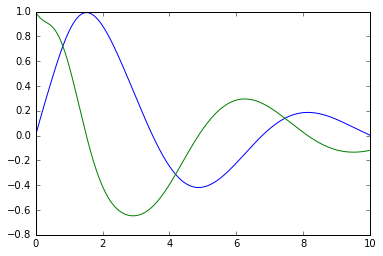

In [128]:
%%time
sol = euler(mi_ec_dif,[0,1],[0,10])
plot(sol[0],sol[1])

b) integración por el método de Taylor de 2° Orden

In [10]:
def segundo_orden(ec_diff,p_ini,t,ec_jac,h=0.1):
    tiempo=arange(t[0],t[1]+h,h)
    y = zeros((len(tiempo),len(p_ini)))
    y[0,:]= p_ini
    for i in range(len(tiempo)-1):
        f=ec_diff(y[i,:],tiempo[i])
        df,jac= ec_jac(y[i,:],tiempo[i])
        y[i+1,:]=y[i,:] +h*f
        y[i+1,:]+= 0.5*h*h*df
        y[i+1,:]+= 0.5*h*h*dot(jac,f)
        solucion=[tiempo,y]
    return solucion

In [11]:
def d_ec_dif(y,t):
    return array([0,(e**(-t))*(-sin(3*t)+3*cos(3*t))]) , array([[0,1], [-cos(y[0]),-0.5]])

Wall time: 304 ms


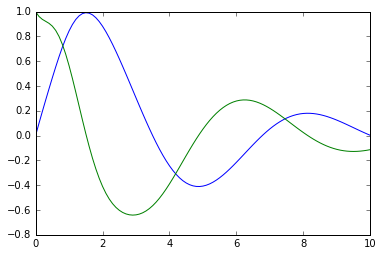

In [438]:
%%time
sol2= segundo_orden(mi_ec_dif,[0,1],[0,10],d_ec_dif)
plot(sol2[0],sol2[1])

c) Integración con método de Runge-Kutta de 2° orden

In [12]:
def rk(ec,p_ini,x,h=0.1):
    tiempos=arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos), len(p_ini)))
    sol[0,:]=p_ini
    for i in xrange(len(tiempos)-1):
        k= h*ec(sol[i,:],tiempos[i])
        f= ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
        sol[i+1,:]=sol[i,:]+h*f
        solucion=[tiempos,sol]
    return solucion

Wall time: 364 ms


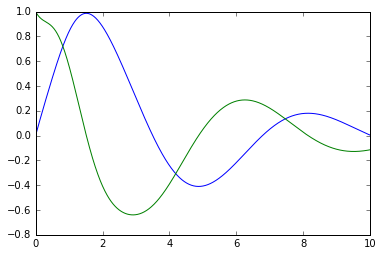

In [440]:
%%time
sol3=rk(mi_ec_dif,[0,1],array([0,10]),0.01)
plot(sol3[0],sol3[1])

d) Integración con método de Runge-Kutta de 4° orden

In [13]:
def rk4(ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        k1 = ec(sol[i,:],tiempos[i])
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
        sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
        solucion=[tiempos,sol]
    return solucion

Wall time: 746 ms


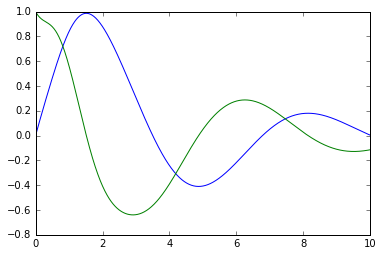

In [442]:
%%time
sol4=rk4(mi_ec_dif,[0,1],array([0,10]),0.01)
plot(sol4[0],sol4[1])

2.
$$
\dddot{y} + \ddot{y}^2 -3\dot{y}^3+\cos^2(y)=e^{-t}sin(3t)
$$

Con las condiciones de frontera: $\ddot{y}(1)=1$ , $\dot{y}=2$ y $y(1)=1$ en $t\in [1,2]$ y $t\in [1,2.1]$

Viendo el tiempo que tardaron cada uno de los métodos para darnos un mismo resultado, podemos determinar al metodo de segundo orden. 

In [14]:
def ec_dif2(y,t):
    return array([y[1],y[2],-(y[2])**2 +3*(y[1])**3-(cos(y[0]))**2+(e**(-t))*sin(3*t)])
def d_ec_dif2(y,t):
    return array([0,0,(e**(-t))*(-sin(3*t)+3*cos(3*t))]), array([[0,1,0],[0,0,1], [2*(sin(y[0]))*cos(y[0]),9*(y[1])**2,-2*y[2]]])

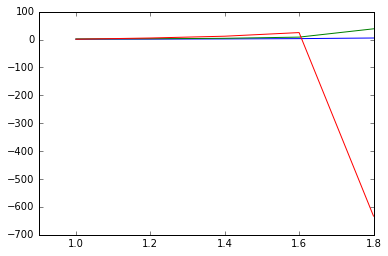

In [444]:
#Para en intervalo [1,2]
solp2= segundo_orden(ec_dif2,[1.,2.,1.],array([1,1.8]),d_ec_dif2,0.2)
plot(solp2[0],solp2[1])

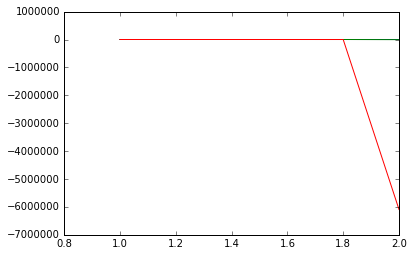

In [445]:
#Para el intervalo [1,2.1]
solp22= segundo_orden(ec_dif2,[1.,2.,1.],[1,1.9],d_ec_dif2,0.2)
plot(solp22[0],solp22[1])

Viendo que nos queda algo extraño, decidimos intentar con los otros métodos

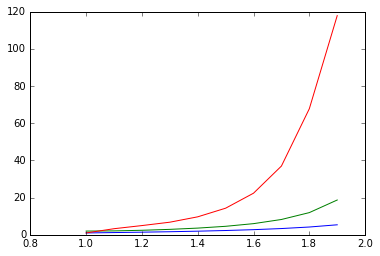

In [446]:
#Para el intervalo[1,2]
solp2e = euler(ec_dif2,array([1.,2.,1.]),[1.,1.9],0.1)
plot(solp2e[0],solp2e[1])

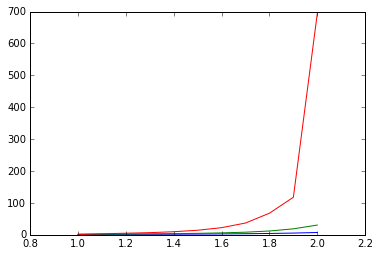

In [447]:
#Para el intervalo[1,2.1]
solp2e2 = euler(ec_dif2,array([1.,2.,1.]),[1.,2.0],0.1)
plot(solp2e2[0],solp2e2[1])

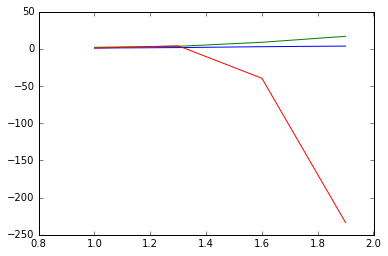

In [448]:
solp2r= rk(ec_dif2,[1.,2.,1.],[1,1.7],0.3)
plot(solp2r[0],solp2r[1])

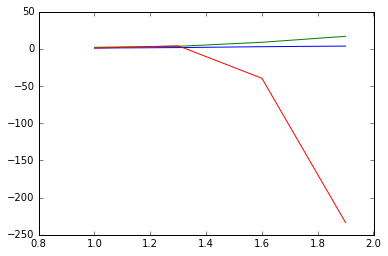

In [449]:
solp2r= rk(ec_dif2,[1.,2.,1.],[1,1.8],0.3)
plot(solp2r[0],solp2r[1])

De donde vemos que el método de euler es el que más nos conviene pues es el único que no converge

$3.$ Si tenemos que 
$$
\ddot{x} + \frac{1}{10}\dot{x}+4\sin(x)=\frac{1}{2}\sin(\omega t)
$$
Con las condiciones de frantera: $\dot{x}(0)=1$ y $x(0)=0$ ademas queremos la solucion para $\omega$={1,1.1,1.2,1.3,...,2.9,3}

In [15]:
def ec_dif3(y,t,w=0):
    return array([y[1],0.5*sin(w*t)-0.1*y[1]-4*sin(y[0])])
def d_ec_dif3(y,t,w=0):
    return array([0,0.5*w*cos(w*t)]), array([[0,1],[-4*cos(y[0]),-0.1]])

a) Método de Euler

In [124]:
def euler3(funcion,p_ini,t_final,args=0,h=0.1):
    tiempos = arange(t_final[0],t_final[1]+h,h)
    y = [0]*len(tiempos) #zeros(len(tiempos))
    y[0] = p_ini
    if args==0:
        for i in range(len(tiempos)-1):
            y[i+1] = y[i] + funcion(y[i],tiempos[i])*h
            solucion=[tiempos,sol]
    else:
        for i in range(len(tiempos)-1):
            y[i+1] = y[i] + funcion(y[i],tiempos[i],args)*h
            solucion = [tiempos,y]
    return solucion

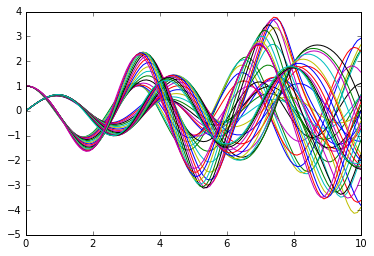

In [125]:
w=arange(1,3,0.1)
for i in w:
    sole3=euler3(ec_dif3,[0,1],[0,10],i)
    plot(sole3[0],sole3[1])

b) Método sobre serie de Taylor de Segundo Orden

In [17]:
def segundo_orden3(ec_diff,p_ini,t,ec_jac,args=0,h=0.1):
    tiempo=arange(t[0],t[1]+h,h)
    y = zeros((len(tiempo),len(p_ini)))
    y[0,:]= p_ini
    if args==0:
        for i in range(len(tiempo)-1):
            f=ec_diff(y[i,:],tiempo[i])
            df,jac= ec_jac(y[i,:],tiempo[i])
            y[i+1,:]=y[i,:] +h*f
            y[i+1,:]+= 0.5*h*h*df
            y[i+1,:]+= 0.5*h*h*dot(jac,f)
            solucion=[tiempos,sol]
    else:
        for i in range(len(tiempo)-1):
            f=ec_diff(y[i,:],tiempo[i],args)
            df,jac= ec_jac(y[i,:],tiempo[i],args)
            y[i+1,:]=y[i,:] +h*f
            y[i+1,:]+= 0.5*h*h*df
            y[i+1,:]+= 0.5*h*h*dot(jac,f)
            solucion=[tiempo,y]
    return solucion

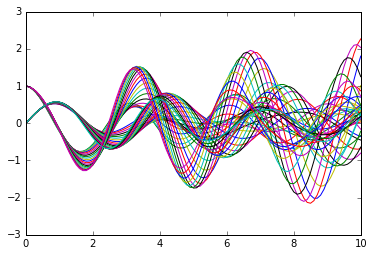

In [454]:
w=arange(1,3,0.1)
for i in w:
    solso3=segundo_orden3(ec_dif3,[0,1],[0,10],d_ec_dif3,i)
    plot(solso3[0],solso3[1])

c)Método de Runge-Kutta de Segundo Orden

In [18]:
def rk3(ec,p_ini,x,args=0,h=0.1):
    tiempos=arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos), len(p_ini)))
    sol[0,:]=p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k= h*ec(sol[i,:],tiempos[i])
            f= ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
            sol[i+1,:]=sol[i,:]+h*f
            solucion=[tiempos,sol]
    else:
        for i in xrange(len(tiempos)-1):
            k= h*ec(sol[i,:],tiempos[i],args)
            f= ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h,args)
            sol[i+1,:]=sol[i,:]+h*f
            solucion=[tiempos,sol]
    return solucion

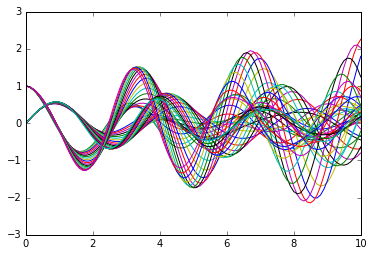

In [456]:
w=arange(1,3,0.1)
for i in w:
    solrk3=rk3(ec_dif3,[0,1],[0,10],i)
    plot(solrk3[0],solrk3[1])

d) Método Runge-Kutta de Orden 4

In [19]:
def rk43(ec,p_ini,x,args=0,h=0.01):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args == 0:        
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
            solucion=[tiempos,sol]
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
            solucion=[tiempos,sol]
    return solucion

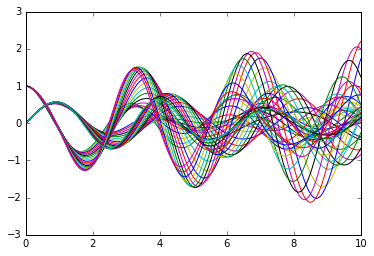

In [115]:
w=arange(1,3,0.1)
for i in w:
    solrk43=rk43(ec_dif3,[0,1],[0,10],i)
    plot(solrk43[0],solrk43[1])

Ahora, para tener un mejor entendimiento de que es lo que está pasando, lo graficamos para un periodo de tiempo mucho más largo.

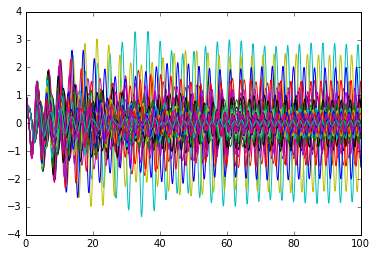

In [21]:
w=arange(1,3,0.1)
for i in w:
    solrk43L=rk43(ec_dif3,[0,1],[0,100],i)
    plot(solrk43L[0],solrk43L[1])

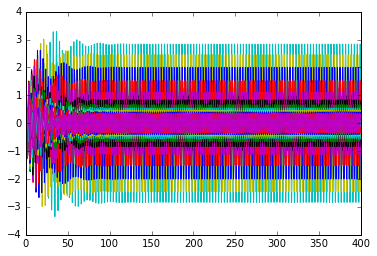

In [22]:
w=arange(1,3,0.1)
for i in w:
    solrk43L=rk43(ec_dif3,[0,1],[0,400],i)
    plot(solrk43L[0],solrk43L[1])

Al comparar estas graficas, podemos ver que llega un tiempo en el cual la funcion se vuelve de amplitud estable. Asimismo, notamos que entre mayor sea el intervalo de timepo, menor es su frecuencia.

Por otro lado, notamos que la amplitud máxima del sistema queda dentro del intervalo de tiempo [30,40]. Sabemos que esta amplitud máxima se consigue por la frecuencia de resonancia. Pues en teoria el máximo deberia de ser menor a 3 pero parece llegar a 3.8.

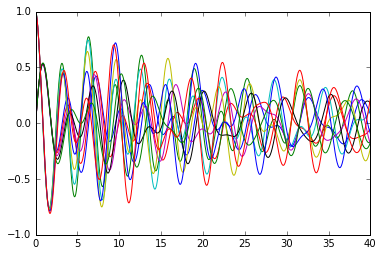

In [23]:
w=arange(1,1.5,0.1)
for i in w:
    solrk43L=rk43(ec_dif3,[0,1],[0,40],i)
    plot(solrk43L[0],solrk43L[1])

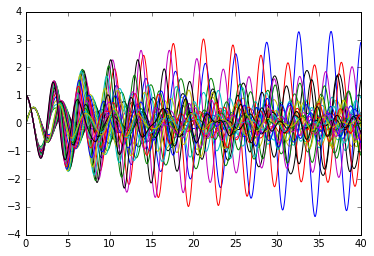

In [24]:
w=arange(1.5,2.9,0.1)
for i in w:
    solrk43L=rk43(ec_dif3,[0,1],[0,40],i)
    plot(solrk43L[0],solrk43L[1])

$4.$
Teniendo el sigiente sistema de ecuaciones:
$$
\dot{x}=10(y-x)
$$

$$
\dot{y}=x(28-z)-y
$$

$$
\dot{z}=xy-\frac{8}{3}z
$$

In [55]:
def ec_dif4(y,t):
    return array([10*(y[1]-y[0]),y[0]*(28-y[2])-y[1],y[0]*y[1]-(8/3)*y[2]])

a) Por simplicidad, para no tener que encontrar la deivada del sistema, utilizaremos Euler. Sinembargo, no hace falta determinar una condicion inicial arbitraria.

In [57]:
def euler4(funcion,p_ini,t_final,h=0.01):
    tiempos = arange(t_final[0],t_final[1]+h,h)
    y = [0]*len(tiempos) #zeros(len(tiempos))
    y[0] = p_ini
    for i in range(len(tiempos)-1):
        y[i+1] = y[i] + funcion(y[i],tiempos[i])*h
    
    return timepos,y


Plano XY

Condiciones de frontera: x(0)= -3 y(0)= -2 z(0)= -4


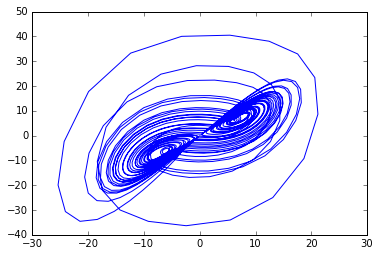

In [68]:
[r1,r2,r3]=[random.randint(-5,5),random.randint(-5,5),random.randint(-5,5)]
t,y = euler4(ec_dif4,[r1,r2,r3],[0,50],0.02)
plot(y[:,0],y[:,1])
print 'Condiciones de frontera: x(0)=',r1 , 'y(0)=',r2,'z(0)=',r3

Plano XZ

Condiciones de frontera: x(0)= 0 y(0)= -4 z(0)= -4


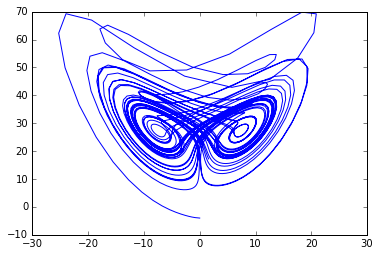

In [69]:
[r1,r2,r3]=[random.randint(-5,5),random.randint(-5,5),random.randint(-5,5)]
t,y = euler4(ec_dif4,[r1,r2,r3],[0,50],0.02)
plot(y[:,0],y[:,2])
print 'Condiciones de frontera: x(0)=',r1 , 'y(0)=',r2,'z(0)=',r3

Plano YZ

Condiciones de frontera: x(0)= 3 y(0)= 2 z(0)= 2


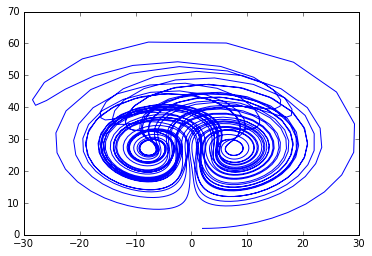

In [71]:
[r1,r2,r3]=[random.randint(-5,5),random.randint(-5,5),random.randint(-5,5)]
t,y = euler4(ec_dif4,[r1,r2,r3],[0,50],0.02)
plot(y[:,1],y[:,2])
print 'Condiciones de frontera: x(0)=',r1 , 'y(0)=',r2,'z(0)=',r3

b) Para este inciso proponemos a [$x_0$,$y_0$,$z_0$]=[1,w,0] donde $w\in(1,2)$ y tomamos un tiempo t=100

En el Plano XY

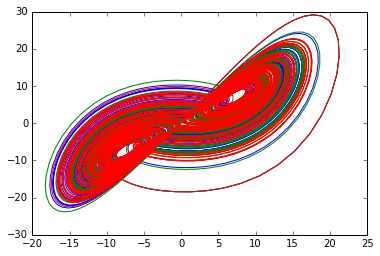

In [108]:
w=arange(2,2.03,0.01)
for i in w:
    t,y = euler4(ec_dif4,[1,i,0],[0,100],0.01)
    plot(y[:,0],y[:,1])

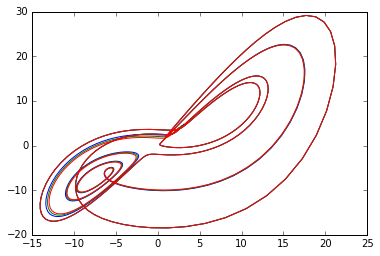

In [111]:
w=arange(2,2.03,0.01)
for i in w:
    t,y = euler4(ec_dif4,[1,i,0],[0,7],0.01)
    plot(y[:,0],y[:,1])

En el plano XZ

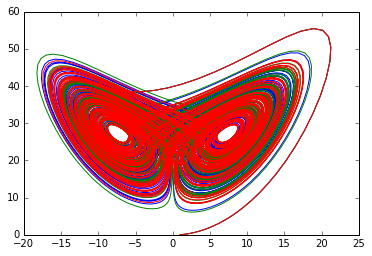

In [106]:
w=arange(2,2.03,0.01)
for i in w:
    t,y = euler4(ec_dif4,[1,i,0],[0,100],0.01)
    plot(y[:,0],y[:,2])

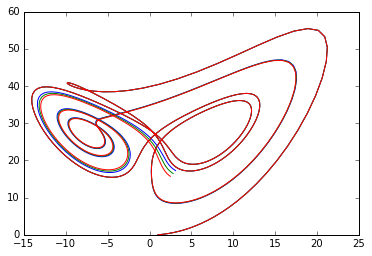

In [112]:
w=arange(2,2.03,0.01)
for i in w:
    t,y = euler4(ec_dif4,[1,i,0],[0,7],0.01)
    plot(y[:,0],y[:,2])

En el plano YZ

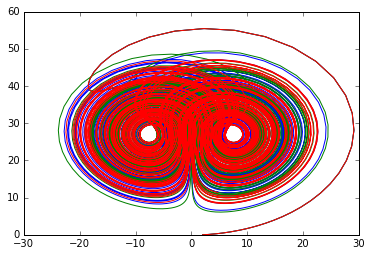

In [101]:
w=arange(2,2.03,0.01)
for i in w:
    t,y = euler4(ec_dif4,[1,i,0],[0,100],0.01)
    plot(y[:,1],y[:,2])

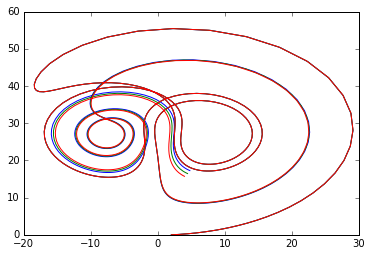

In [100]:
w=arange(2,2.03,0.01)
for i in w:
    t,y = euler4(ec_dif4,[1,i,0],[0,7],0.01)
    plot(y[:,1],y[:,2])

Vemos que hay un tiempo alrededor de t=7 en el que se empiezan a separar la soluciones. Es decir, antes todas seguian un mismo camino (que parece una linea más gruesa) y luego se separen en diferentes colores